<a href="https://colab.research.google.com/github/Bansalnitika21/Nitikabansal21.github.io/blob/master/model_trainingandsaving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MAIN PROGRAM OF TRAINING AND SAVING MODEL**


### **MOUNTING DRIVE**

 To show you why it's complicated and for another reason of storing a trained model too!

In [26]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Defining my_dir so that we can use this long loaction in a short form in later cells**

In [6]:
my_dir="/content/drive/My Drive/Colab Notebooks/waste_classification"

### **LOCATING IN DRIVE**

**The location is in drive**

In [24]:
cd drive

[Errno 2] No such file or directory: 'drive'
/content/drive/My Drive/Colab Notebooks/waste_classification


**The loaction is drive/My Drive**

In [3]:
cd My Drive

/content/drive/My Drive


**The loaction is drive/My Drive/Colab Notebooks**

In [4]:
cd Colab Notebooks

/content/drive/My Drive/Colab Notebooks


**The loaction is drive/My Drive/Colab Notebooks/waste_classification**

In [5]:
cd waste_classification

/content/drive/My Drive/Colab Notebooks/waste_classification


###**ONLY OPEN THIS IF YOU WANT TO SEE THE DIFFERENCE IN TOUGH AND EASY METHOD**


FIRSTLY UPLOAD .JSON FILE THAT YOU DOWNLOADED FROM CREATING API TOKEN

In [ ]:
from google.colab import files
my_file=files.upload()

IMPORTING OS, PANDAS AND SETTING THE ENVIRONMENT VARIABLE

In [ ]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

THIS WILL DOWNLOAD A .ZIP FILE

In [ ]:
!kaggle datasets download -d techsash/waste-classification-data

THIS WILL UNZIP THE .ZIP FILE, DOWNLOADED USING API COMMAND

In [ ]:
!unzip "*.zip"

###**IMPORTING LIBRARIES**


RELOAD

MATPLOTLIB

FASTAI

WARNINGS

In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**BATCHSIZE**

you can replace 64 with 16 in case an error occurs

In [8]:
bs=64

### **DATA**


DEFINING DATA AND ASSIGNING A PATH

You can change dataset to DATASET too

In [17]:
path=""
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("dataset"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())

**DISPLAYING DATA**

You can change rows and figuresize for curiosity

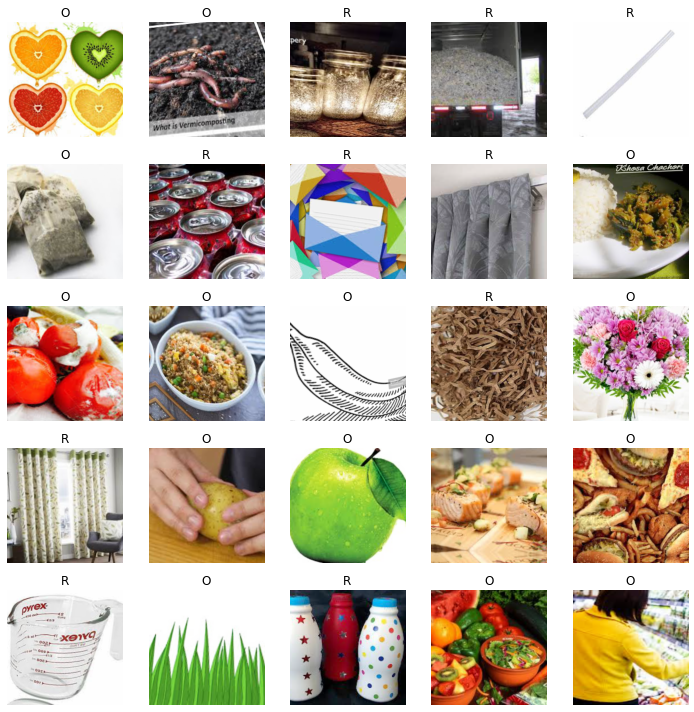

In [18]:
data.show_batch(rows=5, figsize=(10,10))

**Printing the name of the folders inside dataset or DATASET written in above to above cell**

Length means counting how many folders are present inside a directory!!

In [19]:
print(data.classes)
len(data.classes)

['O', 'R']


2

### **MODEL**


**DEFINNING LEARN**

In [20]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

**YOU CHANGE THE NUMBER OF CYCLES**

I CHOSE 4 BECAUSE MY GURUJI TAUGHT ME 4YEARS IN BTECH SO WE SHOULD REPRESENT THOSE 4YEARS IN OUR WORK TOO!!

smile after reading this lol!!

In [23]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.119466,0.115643,0.958325,07:04
1,0.125207,0.101967,0.961715,06:58
2,0.093288,0.089366,0.965304,06:56
3,0.073593,0.086342,0.966700,06:42


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

Ahaan!! Here comes the use of **my_dir** 

**This cell is for saving the trained model in waste_classification folder!!**

This cell will download a .pth file in waste_classification folder

You can change name of the .pth file by replacing waste_classification to something else!!

In [25]:
learn.save(my_dir+"/waste_classification")

**LOADING THE SAVED MODEL**

In [27]:
learn.load("/content/drive/My Drive/Colab Notebooks/waste_classification/waste_classification")

Learner(data=ImageDataBunch;

Train: LabelList (20062 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
O,O,O,O,O
Path: dataset;

Valid: LabelList (5015 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
R,R,R,O,R
Path: dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(

**FOR EXPORTING THE SAVED MODEL**

This cell will generate an export.pkl file in waste_classification folder so that you can write a code and use that .pkl file directly in a new notebook!!

In [29]:
learn.export(my_dir+"/export.pkl")